In [9]:
import pandas as pd
import requests



In [15]:
response = requests.get('https://api.opendota.com/api/heroes')
df = pd.DataFrame(response.json())
df.to_csv('..\homework_data\dota_heroes.csv')


## Easy

Открыть набор данных dota_hero_stats.csv из папки data. 

Данные взяты [отсюда](https://api.opendota.com/api/heroes), на этом же [сайте](https://www.opendota.com/) можно найти больше разнообразных данных по Dota2.

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и посчитайте количество героев для каждого значения legs

In [18]:
df.head(1)

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2


In [27]:
df.groupby(["legs"]).count()["id"]

legs
0    14
2    97
4     8
6     3
8     1
Name: id, dtype: int64

## Normal

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик. Выведите список героев с этим набором характеристик

In [37]:
maxidx = df.groupby(["attack_type","primary_attr"]).count()["id"].idxmax()

In [44]:
df[(df["attack_type"]==maxidx[0])&(df["primary_attr"]==maxidx[1])]

,id,name,localized_name,primary_attr,attack_type,roles,legs
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
12,13,npc_dota_hero_puck,Puck,int,Ranged,"[Initiator, Disabler, Escape, Nuker]",2
16,17,npc_dota_hero_storm_spirit,Storm Spirit,int,Ranged,"[Carry, Escape, Nuker, Initiator, Disabler]",2
20,21,npc_dota_hero_windrunner,Windranger,int,Ranged,"[Carry, Support, Disabler, Escape, Nuker]",2
21,22,npc_dota_hero_zuus,Zeus,int,Ranged,"[Nuker, Carry]",2
23,25,npc_dota_hero_lina,Lina,int,Ranged,"[Support, Carry, Nuker, Disabler]",2
24,26,npc_dota_hero_lion,Lion,int,Ranged,"[Support, Disabler, Nuker, Initiator]",2
25,27,npc_dota_hero_shadow_shaman,Shadow Shaman,int,Ranged,"[Support, Pusher, Disabler, Nuker, Initiator]",2
28,30,npc_dota_hero_witch_doctor,Witch Doctor,int,Ranged,"[Support, Nuker, Disabler]",2


## Hard

В колонке roles находится список того, к каким ролям приписывают создатели Dota того или иного героя. 
Так же у каждого героя есть его основная характеристика, которая записана в колонке primary_attr.

1) Для каждой роли требуется построить bar plot на котором будет видно какое колличество раз героев с тем или иным основным атрибутам создатели игры относят к данной роли.

2) Так же требуется сделать обратный график: для каждого основного аттрибута сделайте bar plot на котором будет видно какое колличество раз создатели Dota относили героя с этим атрибутом к конкретной роли.

3) Сделайте выводы по полученым графикам (это могут быть совершенно любые выводы)

p.s.s Задание непростое. Попробуйте сначала сделать сами. Если не получается, то в ноутбуке 02-solution есть подсказка

In [66]:
import numpy as np

In [90]:
df_roles = df.explode('roles')
df_roles["count"] = 1

In [213]:
df_attr_by_role = df_roles[["roles","primary_attr","count"]]
df_attr_by_role.head(5)

,roles,primary_attr,count
0,Carry,agi,1
0,Escape,agi,1
0,Nuker,agi,1
1,Initiator,str,1
1,Durable,str,1


In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)}) # Увеличить размер графика

In [149]:
unique_roles = df_attr_by_role["roles"].unique()
unique_roles

array(['Carry', 'Escape', 'Nuker', 'Initiator', 'Durable', 'Disabler',
       'Jungler', 'Support', 'Pusher'], dtype=object)

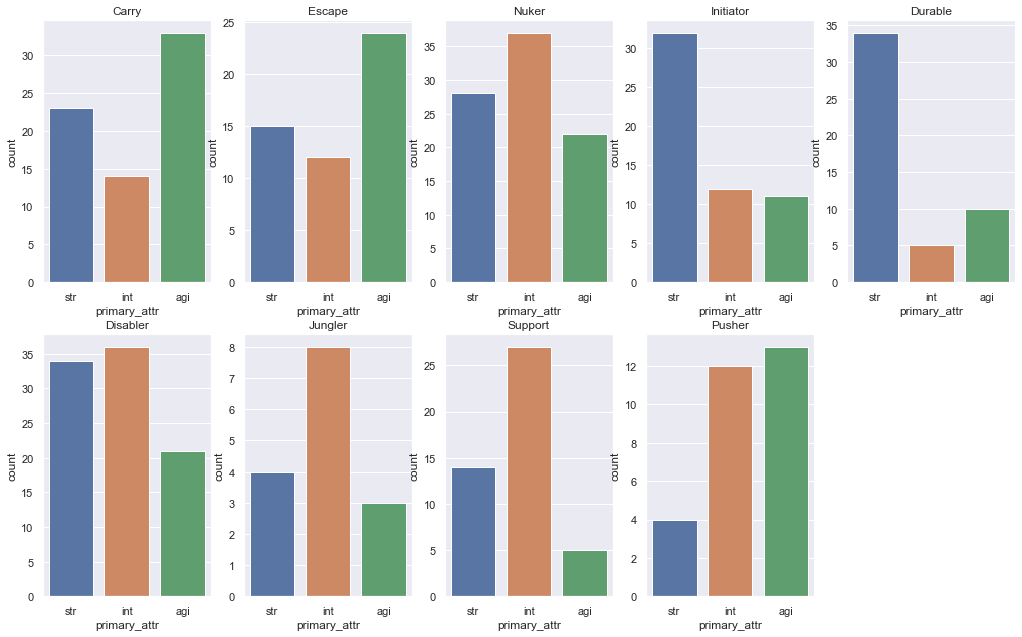

In [211]:
idx = 1
for role in unique_roles:
    vals = df_attr_by_role[df_attr_by_role["roles"] == role]
    plt.subplot(2,5,idx,title=role)
    sns.barplot(data=vals, x="primary_attr", y="count", estimator=np.sum,order=['str','int','agi'])
    idx +=1

plt.subplots_adjust(bottom=-0.2, right=0.8, top=0.6)
    

Выводы по представленным выше графикам: 
1. Распределение ролей по аттрибутам неравномерно, это означает то, что для некоторых ролей предпочтителен один атрибут, для других ролей иные. 
1. Для ролей Nuker и Disabler важны аттрибуты str и int

In [203]:
unique_attr = df_attr_by_role["primary_attr"].unique()
unique_attr

array(['agi', 'str', 'int'], dtype=object)

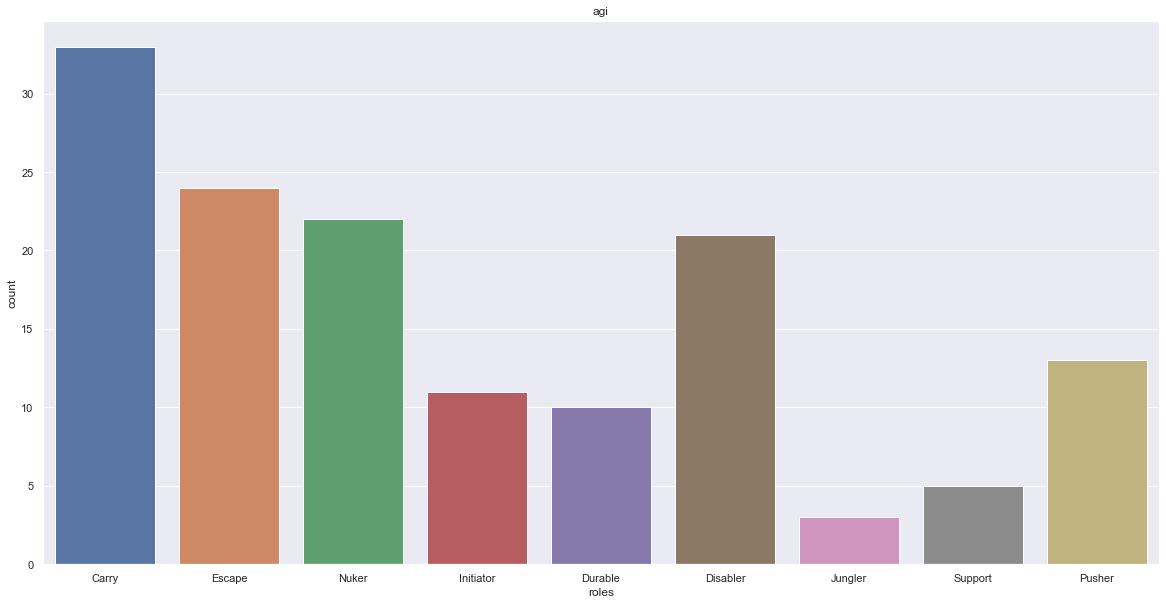

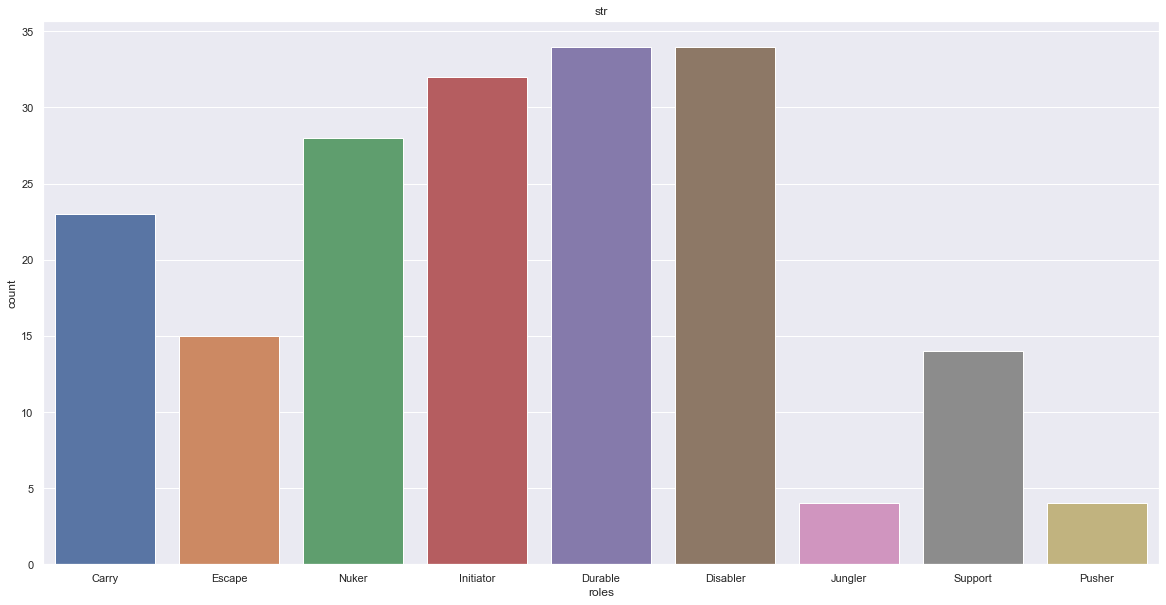

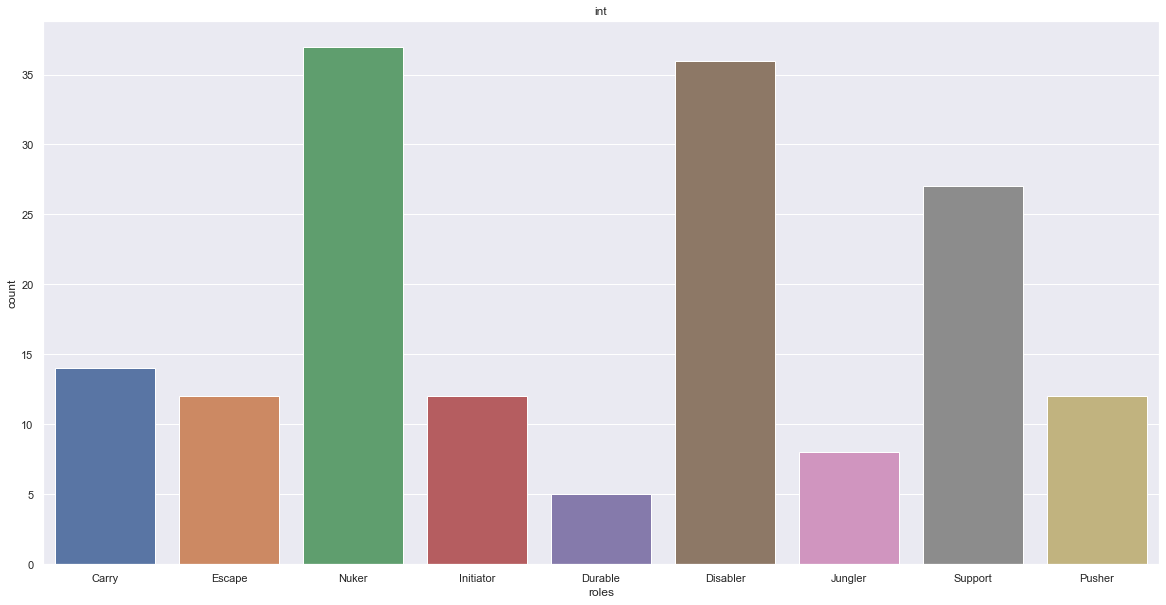

In [212]:
for attr in unique_attr:
    vals = df_attr_by_role[df_attr_by_role["primary_attr"] == attr]
    plt.subplot(1,1,1,title=attr)
    sns.barplot(data=vals, x="roles", y="count", estimator=np.sum, order=unique_roles)
    plt.show()    

Выводы из графиков:
1. Герои с ролью Initiator чаще всего имеют первичный артибут str
1. В игре редки герои с ролью Jungler, независимо от первичного атрибута
1. Первичный атрибут Agi чаще всего встречается у героев с ролью Escape, Carry
1. Герои с ролью Support чаще всего обладают первичным аттрибутом int